Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> GMM y KNN </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: Viernes 29 de Septiembre
    </p>
    <br>
</center>

<br>


## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- En el caso de que se encuentren con problemas al correr celdas por el tamaño del dataset, esta permitido trabajar con una muestra representativa de este, siempre explicitando y justificando sus deciciones.

---


## Librerías

In [55]:
##Importa acá las librerias que vayas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.mixture import GaussianMixture

#Seed

In [56]:
from random import seed

seed(2433)
#No cambiar la seed ya que se usara para su recorrecion

# Parte 1: Carga y Preprocesamiento (10 puntos)

## 1.1 Carga de datos (2 puntos)

Para esta tarea deberás trabajar con el dataset que está en Canvas.

In [57]:
dataset = pd.read_csv("digits.csv")
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2 Descripcion del Dataset (4 puntos)



#### ¿Qué representa cada fila en el dataset entregado? (2 puntos)

RESPUESTA: Cada fila representa una imagen, presumiblemente de un dígito.

La primera columna informa el dígito (*ground truth*) que representa la imagen, y cada una de las otras 784 es un píxel en escala de grises. Las imágenes parecen ser de 28x28.


#### ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

RESPUESTA: No, porque a diferencia de otros datasets, las columnas tienen una relación espacial. No sólo su información individual importa: juntas tienen un efecto sinérgico y el orden en el que están es información adicional y necesaria. No hay conmutatividad. Eliminar columnas afecta el orden y puede hacer desaparecer la esencia de la imagen. Sólo se puede reducir dimensionalidad por medio de proyecciones lineales (PCA) o no lineales (UMAP o t-SNE)

## 1.3 Determina si existen datos nulos. En caso de que existan, eliminalos del dataset. (2 puntos)

RESPUESTA: No hay datos nulos.

In [58]:
# Revisar si hay valores nulos en el dataset
print(dataset.isna().any().any())

False


In [59]:
# Ver las filas (datos individuales) con atributos nulos
print(dataset[dataset.isna().any(axis=1)])

Empty DataFrame
Columns: [label, pixel0, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, ...]
Index: []

[0 rows x 785 columns]


## 1.4 Manejo del Dataset (2 puntos)
Normaliza los valores de las columnas del dataset. ¿Por qué esto es importante?

RESPUESTA:  A pesar de que todas las columnas son píxeles en escala de grises (y por lo tanto en el mismo rango 0-255), normalizar puede ayudar a que los pixeles que naturalmente tienen un rango *de facto* más estrecho (como en los bordes de la imagen), sean tomados más en cuenta por el algoritmo; a una convergencia más rápida del mismo al trabajar con valores más pequeños; así como a mitigar el efecto de los contrastes dentro de una misma imagen.

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Separar al dataset en features y label.
X, y = dataset.drop("label", axis=1), dataset["label"]

X = scaler.fit_transform(X.iloc[:])
X, type(X)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 numpy.ndarray)

#Parte 2: Preguntas Teóricas (10 puntos)

### 2.1 ¿Qué es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal? Refierete a esto según el dataset. (5 puntos)

RESPUESTA: Es un modelo de clustering probabilístico que asigna a cada dato una probabilidad de estar en cada uno de los clusters, siendo el número de estos un hiperparámetro. Funciona bien en casos en los que los datos están agrupados naturalmente en estructuras gaussianas (circulares o elípticas), y donde no hay demasiados datos. Está en desventaja para los datasets con muchos datos (por el costo computacional), de muchas dimensiones (se necesitan más datos para que la estimación del algoritmo sea confiable), o cuya estructura de clusters no se pueda modelar bien con una función de probabilidad gaussiana.

Para este dataset, GMM puede funcionar bien si se baja el número de dimensiones con una técnica como PCA, UMAP o t-SNE.

### 2.2 Explica qué es Akaike Information Criterion ¿Existe alguno que se ajuste mejor a este dataset? Justifique su respuesta. (5 puntos)

RESPUESTA: Es un criterio para seleccionar un modelo, basándose en un balance entre la complejidad del modelo y su verosimilitud (probabilidad de producir el dataset que se intenta modelar).

El mejor para este dataset es 2k - 2ln(L), donde k es la complejidad y L la verosimilitud, y hay que acercarse lo más posible a 0. Esto porque se penaliza fuertemente la complejidad (la fórmula aumenta de manera lineal con k, mientras que disminuye de forma logarítmica con L), y este dataset tiene muchas dimensiones, por lo que sería útil.

# Parte 3: GMM (28 puntos)


## 3.1 PCA y Visualizacion Inicial (6 puntos)


Utiliza PCA de dos dimensiones para colorear los distintos digitos presentes en el dataset. (3 puntos)

RESPUESTA: Se hace PCA y se grafican los data points, junto con imágenes originales que puedan dar cuenta de qué formas particulares (en términos de caligrafía) están cerca una de la otra.

(42000, 2)


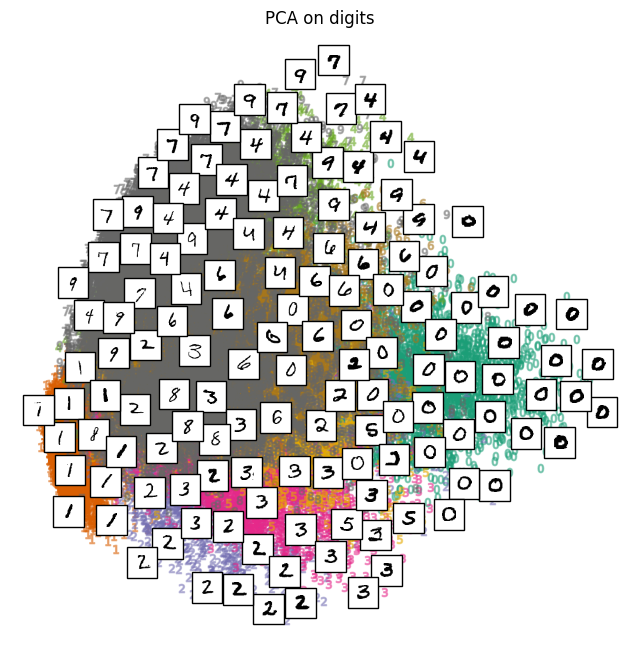

In [61]:
from sklearn.decomposition import PCA
from matplotlib import offsetbox

pca = PCA(n_components=2)
X_lowdim = pca.fit_transform(X)
print(X_lowdim.shape)

def plot_embedding(projection, title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in range(0, 10):
        ax.scatter(
            *projection[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(projection.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((projection[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-1:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [projection[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(X[i].reshape(28, 28), cmap=plt.cm.gray_r, zoom=.5), projection[i],
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

plot_embedding(X_lowdim, "PCA on digits")

Visualizando los digitos, ¿Cuáles son los que más se parecen entre ellos? Especula en que cantidad de clusters sería posible agrupar a los digitos, fuera de un cluster por cada uno. (3 puntos)

RESPUESTA: Al parecer, PCA de 2 dimensiones retiene tan poca varianza que los clusters de dígitos se superponen. Por lo mismo, se ve que el 8, 9, 7 y 4 son extremadamente similares y se podrían agrupar en el mismo cluster. Además, el 3 y 5 también tienden a estar cerca, aunque el 0, 1 y 3 pueden tener un cluster por derecho propio. Por último, se podría intentar agrupar el 0 con el 6, así como el 8 con el 3.

#3.2 Retención Varianza (4 puntos)

Encuentre el numero mínimo de componentes para usar en PCA de tal manera que se mantenga un 75% de varianza. (4 puntos)

RESPUESTA: Se necesitan 33 dimensiones para ello.

In [62]:
pca = PCA(n_components=784)
pca.fit(X)

PCA(n_components=784)

In [63]:
def min_var(v,exp_var):
    """
    Retorna las mínimas dimensiones necesarias para
    retener una varianza relativa v.
    """
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(.75, pca.explained_variance_ratio_)

33

In [64]:
X = PCA(n_components=33).fit_transform(X)

#3.3 Funcion clusterize (5 puntos)

Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar a los digitos en `n` grupos. Debe retornar un dataframe que contenga la clasificación. Corre el método con `n=10`. (5 puntos)

RESPUESTA: El DataFrame retornado consiste en una columna *ground truth* y otra columna con los clusters resultantes.

In [65]:
from sklearn.mixture import GaussianMixture

def cluster(X, n_clusters):
  gmm = GaussianMixture(n_components=n_clusters, covariance_type="full")
  gmm.fit(X)
  clusters = gmm.predict(X)
  df = pd.DataFrame({'digit': y, 'cluster': clusters})

  return df

classification = cluster(X, 10)

#3.4 Preguntas con GMM (5 puntos)

####1. Dado cada cluster, ¿Se puede decir que GMM logro agrupar de forma correcta los distintos digitos? (2.5 puntos)

RESPUESTA: Depende del dígito. El 0, 1, 2 y 6 fueron agrupados con precisión, pero los demás están mezclados en los clusters restantes. Hay dos clusters de 7-9, dos más de 4-7-9, uno de 3-5, y uno de 1-8 (aunque no deben haber muchos 1s, al estar casi todos en su propio cluster).

In [66]:
for i in range(10):
  print(classification[classification['cluster'] == i])

       digit  cluster
6          7        0
18         7        0
28         9        0
29         7        0
47         7        0
...      ...      ...
41957      7        0
41959      9        0
41962      9        0
41969      9        0
41997      7        0

[3254 rows x 2 columns]
       digit  cluster
16         2        1
22         2        1
24         2        1
34         2        1
44         2        1
...      ...      ...
41963      2        1
41965      2        1
41970      2        1
41976      2        1
41981      2        1

[4059 rows x 2 columns]
       digit  cluster
20         8        2
30         8        2
35         1        2
61         1        2
82         8        2
...      ...      ...
41933      1        2
41939      1        2
41961      8        2
41964      8        2
41982      8        2

[3462 rows x 2 columns]
       digit  cluster
8          5        3
10         8        3
40         9        3
70         3        3
80         5        3
.

#### 2. ¿Existe algún(os) digito que se encuentre repartido en mas de 2 clusters? ¿Cuáles? (2.5 puntos)

RESPUESTA: Dada la respuesta anterior, podemos ver que el 7 y el 9 tienen amplia presencia en 4 clusters distintos. El 4 aparece en 2 distintos.

#3.5 Evaluación modelo GMM (5 puntos)

Determine el dígito predominante de cada cluster según el número que más se repita por grupo. Con este digito determinado, calcule la precisión de cada dígito al ser clasificado. (5 puntos)

RESPUESTA: Se ve incluso que el 7 es moda de dos clusters distintos. Se vuelve a comprobar la precisión de la clasificación de 0, 1, 2 y 6. El resto está repartido entre los demás clusters.

In [67]:
for i in range(10):
  clusters = classification[classification['cluster'] == i]
  # mode() calcula el valor más común. Retorna una Series por si hay más de uno.
  mode = clusters['digit'].mode().iloc[0]
  precision = clusters[clusters['digit'] == mode].shape[0] / clusters.shape[0]

  print(f"Cluster {i}, mode: {mode}, precision: {precision}")

Cluster 0, mode: 7, precision: 0.5568531038721574
Cluster 1, mode: 2, precision: 0.9453067257945307
Cluster 2, mode: 8, precision: 0.6051415366839977
Cluster 3, mode: 5, precision: 0.4200792602377807
Cluster 4, mode: 1, precision: 1.0
Cluster 5, mode: 0, precision: 0.9916714531878231
Cluster 6, mode: 7, precision: 0.40519159456118664
Cluster 7, mode: 3, precision: 0.45671248903188066
Cluster 8, mode: 6, precision: 0.9948662523642259
Cluster 9, mode: 4, precision: 0.5075233834892232


#3.6 Agrupación de Dígitos similares (3 puntos)

Corre la función clusterize pero ahora solamente con `4` grupos. Registra las nuevas clasificaciones en un dataframe. (3 puntos)

RESPUESTA:

In [68]:
classification_2 = cluster(X, 4)

In [69]:
for i in range(4):
  print(classification[classification['cluster'] == i])

       digit  cluster
6          7        0
18         7        0
28         9        0
29         7        0
47         7        0
...      ...      ...
41957      7        0
41959      9        0
41962      9        0
41969      9        0
41997      7        0

[3254 rows x 2 columns]
       digit  cluster
16         2        1
22         2        1
24         2        1
34         2        1
44         2        1
...      ...      ...
41963      2        1
41965      2        1
41970      2        1
41976      2        1
41981      2        1

[4059 rows x 2 columns]
       digit  cluster
20         8        2
30         8        2
35         1        2
61         1        2
82         8        2
...      ...      ...
41933      1        2
41939      1        2
41961      8        2
41964      8        2
41982      8        2

[3462 rows x 2 columns]
       digit  cluster
8          5        3
10         8        3
40         9        3
70         3        3
80         5        3
.

In [75]:
for i in range(4):
  clusters_original = classification_2[classification_2['cluster'] == i]
  clusters = clusters_original
  # mode() calcula el valor más común. Retorna una Series por si hay más de uno.
  modes = []
  precisions = []
  # Se detectan los 4 valores más comunes
  for i in range(4):
    modes.append(clusters['digit'].mode().iloc[0])
    precisions.append(clusters_original[clusters_original['digit'] == modes[-1]].shape[0] / clusters_original.shape[0])
    # Quitar el valor mayoritario para detectar el siguiente.
    clusters = clusters[clusters['digit'] != modes[-1]]

  print(f"Cluster {i}, most common values: {modes}, respective precisions: {precisions}")


Cluster 3, most common values: [1, 8, 7, 4], respective precisions: [0.9968469560999272, 0.00218287654620422, 0.0007276255154014067, 0.00024254183846713557]
Cluster 3, most common values: [3, 2, 8, 5], respective precisions: [0.23374646662317894, 0.224559686888454, 0.21689497716894976, 0.20161991737334203]
Cluster 3, most common values: [0, 6, 5, 8], respective precisions: [0.49297700435052827, 0.4865133623368552, 0.008576755748912368, 0.003977625854568055]
Cluster 3, most common values: [7, 9, 4, 3], respective precisions: [0.35265827212311995, 0.3310598111227702, 0.30342777194823367, 0.004197271773347324]


Identifica los digitos que se agruparon en cada cluster y explica la razón de por cual el algoritmo GMM los podría haber agrupado de esa manera.

RESPUESTA: El 1 fue agrupado de manera casi perfecta (aunque hay algunos 8s, probablemente los que fueron dibujados de una manera muy "plana").

En el segundo cluster, el 3, 2, 8 y 5 están casi en cantidades equitativas. Son números que se dibujan de forma parecida, especialmente el 3 y 8, y el 2 y 5.

El tercer cluster está esencialmente repartido entre el 0 y 6. Si dibujo el 6 con un círculo muy grande, va a parecerse mucho a un 0, lo que puede explicar este comportamiento.

Por último, el cuarto cluster se compone de 7, 9 y 4, tal como en muchos de los clusters de n=10. Esto es probablemente porque el 4 es un 9 con el círculo "sin cerrar por arriba", y el 7 es un 9 "sin cerrar por abajo". Al tener caligrafías similares, se agrupan en el mismo cluster.

# Parte 4: KNN (12 puntos)

## 4.1 Separar train y test (4 puntos)

Toma en cuenta el dataset retornado al correr la función clusterize con `n=10`.
Separa el conjunto de datos en train (75%) y test (25%).
Utiliza el ***cluster*** al cual pertenece cada dato como variable de respuesta (y). También determina e imprime la cantidad de datos por cada cluster.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, classification['cluster'], test_size=.25)

for i in range(10):
  print(f"Cluster {i}, length: {classification[classification['cluster'] == i].shape[0]}")

Cluster 0, length: 3254
Cluster 1, length: 4059
Cluster 2, length: 3462
Cluster 3, length: 4542
Cluster 4, length: 3699
Cluster 5, length: 3482
Cluster 6, length: 4045
Cluster 7, length: 6838
Cluster 8, length: 3701
Cluster 9, length: 4918


RESPUESTA: Se utiliza el cluster como variable de respuesta. Todos los clusters, excepto el 7, tienen una cantidad de datos más o menos pareja.

## 4.2 Determina el número óptimo de vecinos con KNeighborsClassifier. (4 puntos)
Los valores a probar son: 1, 5, 8 y 10. Utiliza la métrica score para justificar tu elección.

In [79]:
from sklearn.neighbors import KNeighborsClassifier

for i in [1, 5, 8, 10]:
  nbrs = KNeighborsClassifier(n_neighbors=i)
  clf = nbrs.fit(X_train, y_train)
  print(f"{i} vecinos, score: {clf.score(X_test, y_test)}")



1 vecinos, score: 0.8813333333333333
5 vecinos, score: 0.8945714285714286
8 vecinos, score: 0.8932380952380953
10 vecinos, score: 0.8930476190476191


RESPUESTA: El número óptimo de vecinos, aunque por un margen estrecho, es de 5.

## 4.3 Evalua el mejor clasificador de 4.2. (4 puntos)
 Comenta al respecto en el contexto del dataset acerca del rendimiento por cada cluster del mejor clasificador encontrado.

In [80]:
from sklearn.metrics import classification_report

nbrs = KNeighborsClassifier(n_neighbors=5)
clf = nbrs.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       826
           1       0.94      0.95      0.95      1029
           2       0.80      0.82      0.81       857
           3       0.88      0.78      0.83      1138
           4       0.91      1.00      0.95       910
           5       0.91      0.99      0.95       859
           6       0.89      0.91      0.90       997
           7       0.95      0.81      0.87      1771
           8       0.90      0.98      0.94       888
           9       0.92      0.88      0.90      1225

    accuracy                           0.89     10500
   macro avg       0.89      0.91      0.90     10500
weighted avg       0.90      0.89      0.89     10500



RESPUESTA: El clasificador tiene un rendimiento parejo entre clusters. La peor precisión (cluster 0) es 0.8, y la mejor (cluster 7) es 0.95. Además, el clasificador demuestra arrojar pocos "falsos negativos" para la pertenencia a un cluster, como se ve en los valores altos de *recall*.